# Titanic-Kaggle

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading data

In [2]:
# 讀取資料
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 查看資料大小
print('train data :', train.shape)
print('test data :', test.shape)

# 將訓練和測試資料合併為一個資料,資料名稱為full
full=train.append(test, ignore_index=True)
print('full :', full.shape)
full.tail()

train data : (891, 12)
test data : (418, 11)
full : (1309, 12)


C:\Users\danny\AppData\Local\Temp\ipykernel_19840\3601765111.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full=train.append(test, ignore_index=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Exploratory Data Analysis (EDA) & Feature Engineering

### 查看資料

In [3]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 確認 full data 哪些資料有缺失值

In [5]:
# 確認還有哪些資料有缺失值
# 確認 Survived 有 418 個缺失值
# 確認 Age 有 263 個缺失值
# 確認 Fare 有 1 個缺失值
# 確認 Cabin 有 1014 個缺失值
# 確認 Embarked 有 2 個缺失值
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Pclass(艙位)  與 Survived(生存率)的關係

艙位為"1"，其乘客生存率為0.63
艙位為"2"，其乘客生存率為0.47
艙位為"3"，其乘客生存率為0.24


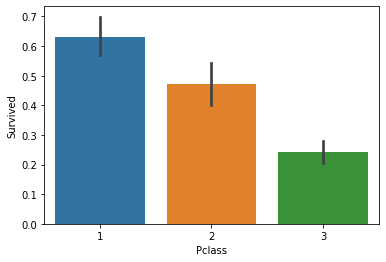

In [6]:
# 查看'艙位'與'生存率'的關係。
# Survived : 0 = No, 1 = Yes
# Pclass : 1 = 1st, 2 = 2nd, 3 = 3rd
sns.barplot(data=train, x='Pclass', y='Survived')

# 計算不同'艙位'，其乘客'生存率'。
# 一等艙的存活率最高。
print('艙位為"1"，其乘客生存率為%.2f' %train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1])
print('艙位為"2"，其乘客生存率為%.2f' %train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1])
print('艙位為"3"，其乘客生存率為%.2f' %train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1])

### Sex(性別) 與 Survived(生存率)的關係

性別為"male"，其乘客生存率為0.19
性別為"female"，其乘客生存率為0.74


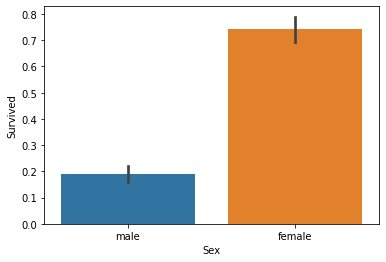

In [7]:
# 查看'性別'與'生存率'的關係。
sns.barplot(data=train, x='Sex', y='Survived')

# 計算不同'性別'，其乘客'生存率'。
# Survived : 0 = No, 1 = Yes
# 女性存活率最高。
print('性別為"male"，其乘客生存率為%.2f' %train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1])
print('性別為"female"，其乘客生存率為%.2f' %train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1])

### SibSp(兄弟姐妹/配偶人數) 與 Survived(生存率)的關係

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

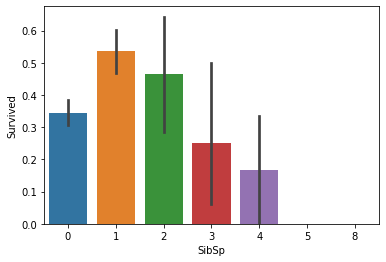

In [8]:
# 查看'兄弟姐妹/配偶人數'與'生存率'的關係。
# 兄弟姐妹/配偶人數少的人生存率較高。
sns.barplot(data=train, x='SibSp', y='Survived')

### Parch(父母/小孩人數) 與 Survived(生存率)的關係

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

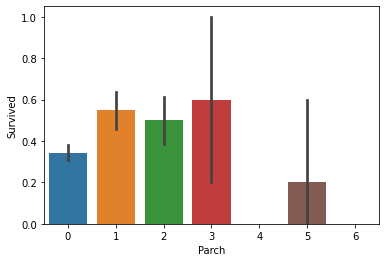

In [9]:
# 查看'父母/小孩人數'與'生存率'的關係。
# 父母/小孩人數'少的人生存率較高。
sns.barplot(data=train, x='Parch', y='Survived')

### Embarked(登船地)缺失值處理

In [10]:
# 填補 Embarked 資料
# 查看 full 資料集裡的 Embarked 資料，確認 'S' 為最多筆。
print(full['Embarked'].value_counts())
# 將 full 資料集裡 Embarked 為缺失值的資料填補為 'S' 。
full['Embarked']=full['Embarked'].fillna('S')

S    914
C    270
Q    123
Name: Embarked, dtype: int64


### Embarked(登船地) 與 Survived(生存率)的關係

登船地為"S"，其乘客生存率為0.34
登船地為"C"，其乘客生存率為0.55
登船地為"Q"，其乘客生存率為0.39


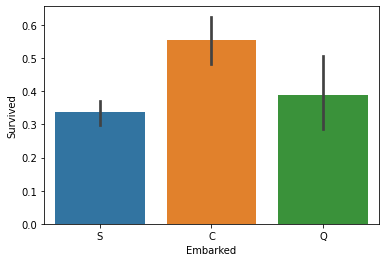

In [11]:
# 查看'登船地'與'生存率'的關係。
sns.barplot(data=train , x='Embarked', y='Survived')

# 計算不同'登船地'，其乘客'生存率'。
# Survived : 0 = No, 1 = Yes
# Embarked : C = Cherbourg, Q = Queenstown, S = Southampton
# 登船地C的生存率最高。
print('登船地為"S"，其乘客生存率為%.2f' %train['Survived'][train['Embarked']=='S'].value_counts(normalize=True)[1])
print('登船地為"C"，其乘客生存率為%.2f' %train['Survived'][train['Embarked']=='C'].value_counts(normalize=True)[1])
print('登船地為"Q"，其乘客生存率為%.2f' %train['Survived'][train['Embarked']=='Q'].value_counts(normalize=True)[1])

e:\Python\Python-3.9\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
e:\Python\Python-3.9\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
e:\Python\Python-3.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


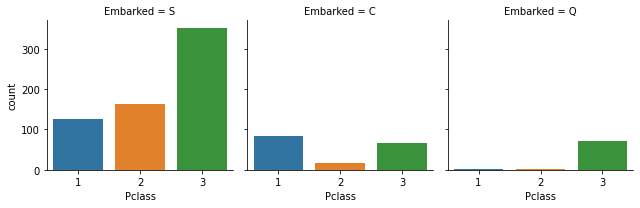

In [12]:
# 查看'機票艙位'與'登船地'的關係。
# 買一等艙的人較少
sns.factorplot('Pclass', col='Embarked', data=train ,kind='count', size=3)

### Embarked(登船地)缺失值處理

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

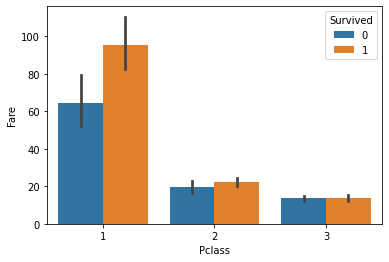

In [13]:
# Pclass(船艙)的頭等艙與Fare(票價)最有關係 
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

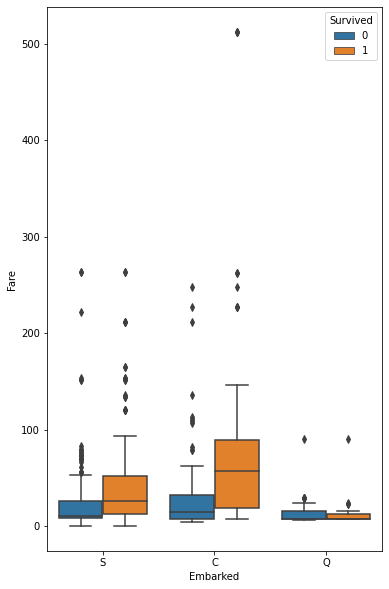

In [14]:
# Embarked(登船地)’S’與Fare(票價)最有關係
plt.figure(figsize=(6, 10))
sns.boxplot(data=train, x='Embarked', y='Fare', hue='Survived')

### Fare(票價)缺失值處理

In [15]:
# 填補 Fare 的缺失值
# Pclass 為 1 和 Embarked 為 'S' 跟票價相關性高。
''' 將 full 資料集裡 Pclass 為 1 且 Embarked 為 'S' 的 Fare 的資料的平均值，
填補到 full 資料集裡 Fare 為缺失值的資料。'''
full['Fare']=full['Fare'].fillna(full[(full['Pclass']==1)&(full['Embarked']=='S')]['Fare'].mean())

### Fare(票價) 與 Survived(生存率) 的關係

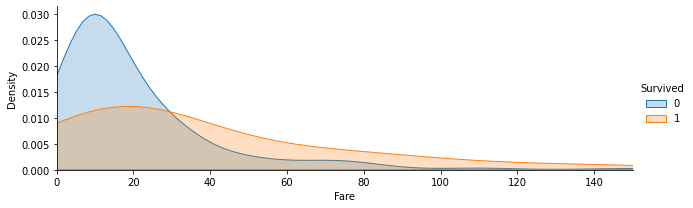

In [16]:
# Fare(票價) 與 Survived(生存率) 的關係
# train : 讀取 train 資料
# hue : 配合 add_legend() 使用，標題設為'Survived'
# aspect : 調整 X 軸的大小
ageFacet = sns.FacetGrid(train, hue='Survived', aspect=3)
# 增加使用 sns.kdeplot 
# 'Fare' : 指定 x 軸上的位置的變量。
# shade : 將圖型填補顏色
ageFacet.map(sns.kdeplot, 'Fare', shade=True)
# 添加圖示說明
ageFacet.add_legend()
# 設定X軸範圍為0歲到150
ageFacet.set(xlim=(0,150))

#### Name(姓氏)資料處理

In [17]:
# 整理姓名
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
# 查看 Title 做分類且計算數量
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [18]:
# 依照姓氏的相關意思進行分類
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

# TDict = [(['Mr'], 'Mr'), 
#           (['Mlle', 'Miss'], 'Miss'),
#           (['Master', 'Jonkheer'], 'Master'),
#           (['Mme', 'Ms', 'Mrs'], 'Mrs'),
#           (['Don', 'the Countess', 'Dona', 'Lady', 'Sir'], 'Royalty'),
#           (['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
#           ]
# TitleDict = {
#     new_key: new_val
#     for keys, new_val in TDict
#     for new_key in keys
#     }

# 新增 Title 欄位，將相同姓氏做資料合併
full['Title']=full['Title'].map(TitleDict)
# 計算 Title 做分類且計算數量
full['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: Title, dtype: int64

In [19]:
### 確認 full data 的資料，是否有新增 Title 欄位
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### Title欄位與Survived(生存率)的關係

<AxesSubplot:xlabel='Title', ylabel='Survived'>

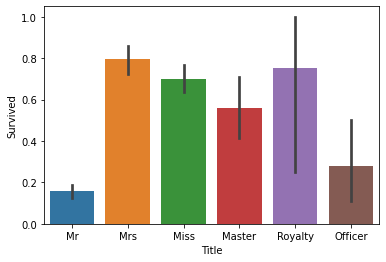

In [20]:
### 繪製Title(姓氏)與Survived(生存率)的關係
sns.barplot(data=full, x='Title', y='Survived')

#### Parch(父母/小孩人數) 和 SibSp(兄弟姐妹/配偶人數)資料處理

In [21]:
### 新增 familyNum 欄位，將 Parch(父母/小孩人數) 和 SibSp(兄弟姐妹/配偶人數) 做資料合併
full['familyNum']=full['Parch']+full['SibSp']+1

<AxesSubplot:xlabel='familyNum', ylabel='Survived'>

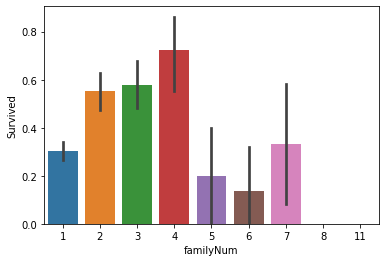

In [22]:
### 繪製 familyNum 與 Survived(生存率)的關係
sns.barplot(data=full, x='familyNum', y='Survived')

In [23]:
# 定義 function 名稱為 familysize，
# 將存活率接近的 familyNum 資料做分類，且數值化表示
def familysize(familyNum):
    # 家族規模 1,7 生存率接近分為一類，以數字0表示；
    if (familyNum==1) | (familyNum==7):
        return 0
    
    # 家族規模 2,3,4 生存率接近分為一類，以數字1表示；
    elif (familyNum>=2) & (familyNum<=4):
        return 1
    
    # 家族規模 5,6 生存率接近分為一類，以數字2表示；
    else:
        return 2

# 新增 familySize 欄位，將家族規模生存率接近的資料分類，且數值化表示
full['familySize']=full['familyNum'].map(familysize)
# 查看 familySize 做分類且計算數量
full['familySize'].value_counts()

0    806
1    437
2     66
Name: familySize, dtype: int64

<AxesSubplot:xlabel='familySize', ylabel='Survived'>

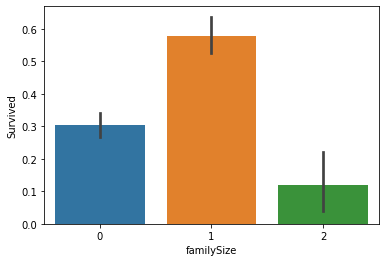

In [24]:
# familySize欄位與Survived(生存率)的關係
# 繪製 familySize 與 Survived(生存率)的關係
# 可以看出家族規模為2,3,4時，生存率是最高的
sns.barplot(data=full, x='familySize', y='Survived')

#### Ticket(票號)資料處理

In [25]:
# 查看Ticket(票號)做分類且計算數量
full['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [26]:
# 宣告名為 TicketCountDict 的字典變數
TicketCountDict={}
# 將 Ticket(票號) 資料分類且計算數量，給值到 TicketCountDict 變數裡
TicketCountDict=full['Ticket'].value_counts()
# 查看 TicketCountDict 資料
TicketCountDict

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [27]:
# 在 full 資料集新增欄位 TickCot ，
# 將 Ticket 資料做分類且計算數量，給值到新欄位 TickCot 
full['TickCot']=full['Ticket'].map(TicketCountDict)
# 查看 TickCot 資料
full['TickCot']

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: TickCot, Length: 1309, dtype: int64

<AxesSubplot:xlabel='TickCot', ylabel='Survived'>

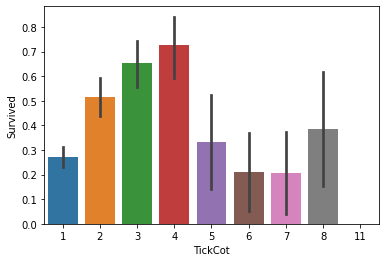

In [28]:
# TickCot欄位與Survived(生存率)的關係
# 繪製 TickCot 與 Survived(生存率)的關係
sns.barplot(data=full, x='TickCot', y='Survived')

In [29]:
# 定義 function 名稱為 TicketCountGroup，
# 將存活率接近的 TickCot 資料做分類，且數值化表示
def TicketCountGroup(TickCot):

    # 將存活率接近的 2,3,4 資料做分類，且數值化表示
    if (TickCot>=2) & (TickCot<=4):
        return 0
    
    # 將存活率接近的 1,5,8 資料做分類，且數值化表示
    elif(TickCot==1) | (TickCot==5) | (TickCot==8):
        return 1
    
    # 將存活率接近的 6,7,11 資料做分類，且數值化表示
    else:
        return 2

# 新增 TicketGroup 欄位，將TickCot存活率接近的資料分類，且數值化表示
full['TicketGroup']=full['TickCot'].map(TicketCountGroup)
# 查看 TicketGroup 做分類且計算數量
full['TicketGroup'].value_counts()

1    764
0    475
2     70
Name: TicketGroup, dtype: int64

In [30]:
### 確認 full data 的資料，是否有新增 TicketGroup 欄位
full.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'familyNum',
       'familySize', 'TickCot', 'TicketGroup'],
      dtype='object')

#### TicketGroup欄位與Survived(生存率)的關係

<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

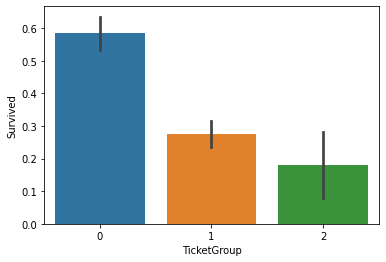

In [31]:
# 繪製 TicketGroup 與 Survived(生存率)的關係，可以看出分類0的生存率最高
sns.barplot(data=full, x='TicketGroup', y='Survived')

#### Age(年齡)缺失值處理

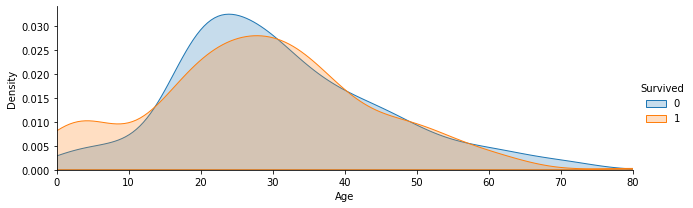

In [32]:
# 繪製 Age(年齡)與Survived(生存率)的關係
# train : 讀取 train 資料
# hue : 配合 add_legend() 使用，標題設為'Survived'
# aspect : 調整 X 軸的大小
ageFacet = sns.FacetGrid(train, hue='Survived', aspect=3)
# 增加使用 sns.kdeplot 
# Fare : 指定 x 軸上的位置的變量。
# shade : 將圖型填補顏色
ageFacet.map(sns.kdeplot,'Age', shade=True)
# 添加圖示說明
ageFacet.add_legend()
# 設定X軸範圍為0歲到最大的年齡
''' 可以看出0~10歲和15~40歲這兩個年齡層Survived(生存率)較大，遇難時優先保護小孩
子是普遍的價值觀；一般出遊的人年紀落在15~40歲的人數會相對較多，所以Survived(生存率)
有集中於15~40歲的趨勢'''
ageFacet.set(xlim=(0,train['Age'].max()))

In [33]:
''' 新增變數 AgePre ，將 full 裡面的 'Age','Pclass','Title','TickCot',
    'familyNum','Parch','SibSp' 資料給變數 AgePre'''
AgePre =full[['Age','Pclass','Title','TickCot','familyNum','Parch','SibSp']]
# one-hot encoding
# 將類別變量轉換為標籤變量，不會受到級別影響
AgePre=pd.get_dummies(AgePre)
# 新增變數 AgeCorrDf 設為 DataFrame 的二維資料結構
AgeCorrDf=pd.DataFrame()
# 計算 AgePre 的相關係數求取
AgeCorrDf=AgePre.corr()
# 查看 Age 欄位的相關係數求取
# 取值接近-1，表示反相關，類似反比例函數，取值接近1，表正相關
AgeCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCot         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [34]:
# one-hot encoding
# 將類別變量轉換為標籤變量
''' 分別對Parch、SibSp、Pclass進行get_dummies()，然後給值到變數ParAge、SibAge、PclAge'''
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')

# 將資料 AgePre,ParAge,SibAge,PclAge 作合併AgePre
AgePre=pd.concat([AgePre,ParAge,SibAge,PclAge],axis=1)

# 查看 AgePre 的資訊
AgePre.columns

Index(['Age', 'Pclass', 'TickCot', 'familyNum', 'Parch', 'SibSp',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Parch_9', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [35]:
# 拆分資料
# 將age有值的資料集，全部取出
AgeKnown=AgePre[AgePre['Age'].notnull()]

# 拆分AgePre資料為Features和Label
# Features將Age欄位刪除
AgeKnown_X=AgeKnown.drop(['Age'],axis=1) # Features
# Label只取Age欄位
AgeKnown_y=AgeKnown['Age'] # Label

# 利用RF建模型
from sklearn.ensemble import RandomForestRegressor
# random_state : 不設定控製樣本自舉的隨機性
# n_estimators : 森林中的樹木數量設為500。
# n_jobs : 要並行運行的作業數。-1 表示使用所有處理器。
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
# 進行資料預處理
rfr.fit(AgeKnown_X,AgeKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [36]:
# 進行評分
rfr.score(AgeKnown_X,AgeKnown_y)

0.5873953317228862

In [37]:
# 取出AgePre資料age為null的資料集
AgeUnKnown=AgePre[AgePre['Age'].isnull()]
# 製作生成Prediction資料的Features
AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

# 預測 Age
AgeUnKnown_y=rfr.predict(AgeUnKnown_X)
# 將預測 Age 填入到缺失值裡
full.loc[full['Age'].isnull(),['Age']]=AgeUnKnown_y
# 查看 full 資料集資訊
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  TickCot      1309 non-null   int64  
 16  TicketGroup  1309 non-null   int64  
dtypes: float64(3), int64(8), object(6)
memory usage: 174.0+ KB


In [38]:
# 查看 full 資料有哪些欄位名稱
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familySize,TickCot,TicketGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,1,1


#### Survived 資料處理

In [39]:
''' 使用map()、lambda、split()、strip()
對full資料集裡'Name'欄位的資料進行姓氏處理，
在full資料集新增'Surname'欄位，將資料給欄位'Surname' '''
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())

# 創建名稱為 SurNameDict 的字典變數
SurNameDict={}
# 將 full 資料集的 'Surname' 欄位做分類計算數量，並給值到 SurNameDict
SurNameDict=full['Surname'].value_counts()
# 在 full 資料集裡，新增欄位'SurnameNum'，
# 並選擇 full 資料集裡欄位為 'Surname' 的資料，
# 將資料給欄位'SurnameNum'
full['SurnameNum']=full['Surname'].map(SurNameDict)

# 創建MaleDf變數，資料為家庭成員大於等於2且年齡大於12歲的男性。
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
# 創建FemChildDf變數，資料為家庭成員大於等於2而且為女性或年齡小於等於12歲的人。
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]

In [40]:
''' 使用groupby()，用MaleDf的Survived資料，
對MaleDf的Surname資料進行分類並計算平均值，
並存入MSurNamDf變數。 '''
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
# 計算生存率總數
print(MSurNamDf.value_counts())

0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64


In [41]:
''' 取出MSurNamDf生存率為1的姓氏，
並存入MSurNamDict變數。'''
# 1 為生存下來的
MSurNamDict={}
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict

Index(['Beane', 'Beckwith', 'Bishop', 'Cardeza', 'Chambers', 'Dick',
       'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
       'Greenfield', 'Harder', 'Hoyt', 'Kimball', 'Lindqvist', 'McCoy',
       'Nakid', 'Persson', 'Taylor'],
      dtype='object', name='Surname')

In [42]:
''' 使用groupby()，用FemChildDf的Survived資料，
對FemChildDf的Surname資料進行分類並計算平均值，
並存入FCSurNamDf變數。'''
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
# 計算生存率總數
FCSurNamDf.value_counts()

1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

In [43]:
''' 取出FCSurNamDf生存率為0的姓氏，
並存入FCSurNamDict變數。'''
# 0 為不會生存下來的
FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
       'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
       'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
       'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
       'Vander Planke', 'Zabour'],
      dtype='object', name='Surname')

In [44]:
''' 將資料集中Survived為空白值，
且資料集中Surname為MSurNamDict，
且性別為男性的進行填補和修正，
性别改為女、Age改為5。'''
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5

''' 將資料集中Survived為空白值，
且資料集中Surname為FCSurNamDict，
且性別為女性及兒童的資料進行填補和修正，
性别改為男、Age改為60。'''
#對資料集中的這些姓氏的女性及兒童資料進行修正：1、性别改為男；2、Age改為60。
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60

## Select Features

### 選擇資料

In [45]:
''' 新建變數fullSel，將full資料的Cabin,Name,Ticket,PassengerId,
Surname,SurnameNum欄位刪除，
並將值給變數fullSel'''
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
# 進行Survived欄位的相關係數求取
corrDf=pd.DataFrame()
# 進行fullSel的相關係數求取，並將值給變數corrDf
''' 類似反比例函數，
取值接近-1，表示反相關，取值接近1，表正相關'''
corrDf=fullSel.corr()
# 查看 Survived 欄位的相關係數求取
# 取值接近-1，表示反相關，類似反比例函數，取值接近1，表正相關
corrDf['Survived'].sort_values(ascending=True)

Pclass        -0.338481
TicketGroup   -0.307413
Age           -0.059616
SibSp         -0.035322
familyNum      0.016639
TickCot        0.064962
Parch          0.081629
familySize     0.117674
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

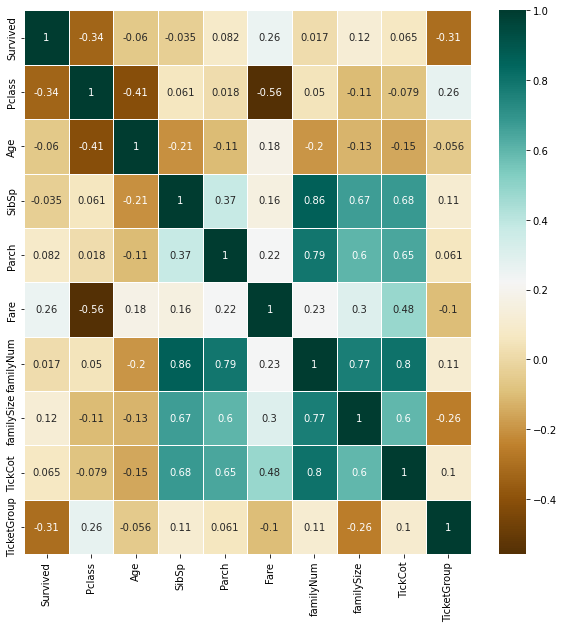

In [46]:
# 設定圖片大小為 10 X 10
plt.figure(figsize=(10,10))

# 使用HeatMap()繪製Survived與其他Feature間相關性大小
''' 可以看出SibSp,Parch,familyNum,TickCot欄位相關性太高，
所以刪除，並免過度擬合 '''
sns.heatmap(fullSel.corr(), # fullSel 資料欄位的相關係數求取
            cmap='BrBG', # 顏色黃到綠
            annot=True, # 顯示在每個單位格內資料的值
            linewidths=1) # 設定分割每個單元格的線的寬度為 1

In [47]:
# 將相關性太高的資料欄位刪除
fullSel=fullSel.drop(['SibSp','Parch','familyNum','TickCot'],axis=1)

# one-hot Encoding
# 將類別變量轉換為標籤變量，不會受到級別影響
''' 分別對fullSel、Pclass、TicketGroup、familySize進行get_dummies()，
然後給值到變數fullSel、PclassDf、TickGroupDf、familySizeDf。 '''
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TicketGroup'],prefix='TicketGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')

# 將資料fullSel、PclassDf、TickGroupDf、familySizeDf作合併到fullSel
fullSel=pd.concat([fullSel,PclassDf,TickGroupDf,familySizeDf],axis=1)

In [48]:
# 將fullSel的Survived為非空白值的資料取出，並給值到變數experData
experData=fullSel[fullSel['Survived'].notnull()]
# 移除experData的Survived資料，當作訓練集的Features，並給值到變數experData_X
experData_X=experData.drop('Survived',axis=1)
# 使用experData的Survived資料，當作訓練集的Label，並給值到變數experData_y
experData_y=experData['Survived']

# 將fullSel的Survived是空白值的資料取出，並給值到變數perData
preData=fullSel[fullSel['Survived'].isnull()]
# 移除preData的Survived資料，當作測試資料Features，並給值到變數perData_X
preData_X=preData.drop('Survived',axis=1)

In [49]:
experData_X.columns

Index(['Pclass', 'Age', 'Fare', 'familySize', 'TicketGroup', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'TicketGroup_0', 'TicketGroup_1',
       'TicketGroup_2', 'familySize_0', 'familySize_1', 'familySize_2'],
      dtype='object')

In [50]:
experData_y.info()

<class 'pandas.core.series.Series'>
Int64Index: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [51]:
preData_X.columns

Index(['Pclass', 'Age', 'Fare', 'familySize', 'TicketGroup', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'TicketGroup_0', 'TicketGroup_1',
       'TicketGroup_2', 'familySize_0', 'familySize_1', 'familySize_2'],
      dtype='object')

## Modeling

In [52]:
''' 匯入演算法 SVC()、DecisionTreeClassifier()、
RandomForestClassifier()、ExtraTreesClassifier()、
GradientBoostingClassifier()、KNeighborsClassifier()、
LogisticRegression()、LinearDiscriminantAnalysis()
為了進行演算法的效果選擇'''
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

# 建立陣列classifiers，將所有演算法合併
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

# n_splits : 設定折叠次数為 10 次
kfold=StratifiedKFold(n_splits=10)

In [53]:
# 進行每個演算法計算
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy', # 返回正確分類樣本的比例
                                      cv=kfold, # kfold : 設定折叠次数為 10 次
                                      n_jobs=-1)) # n_jobs=-1 : 使用所有處理器執行運算
# cv_results

In [54]:
# 計算每個演算法結果的平均值、標準差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
''' 新增名稱為cvResDf的DataFrame，
來紀錄和查看每個演算法的結果'''
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                      'cv_std':cv_std,
                      'algorithm':['SVC',
                      'DecisionTreeClassifier',
                      'RandomForestClassifier',
                      'ExtraTreesClassifier',
                      'GradientBoostingClassifier',
                      'KNN',
                      'LR',
                      'LinearDiscriminantAnalysis']})
cvResDf

,cv_mean,cv_std,algorithm
0,0.675718,0.042975,SVC
1,0.784557,0.051455,DecisionTreeClassifier
2,0.799139,0.044308,RandomForestClassifier
3,0.785643,0.039653,ExtraTreesClassifier
4,0.830562,0.041096,GradientBoostingClassifier
5,0.728377,0.026654,KNN
6,0.824919,0.030624,LR
7,0.820412,0.031851,LinearDiscriminantAnalysis


e:\Python\Python-3.9\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


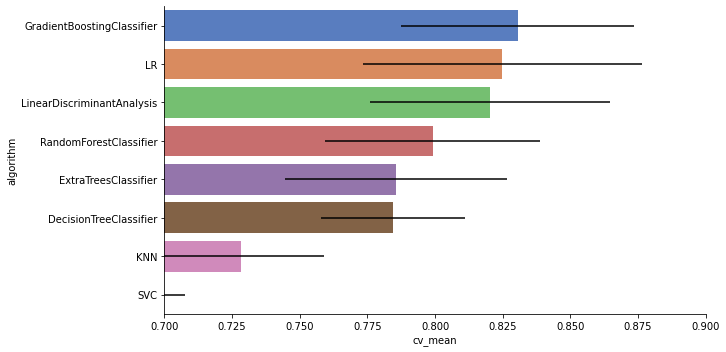

In [55]:
# Model Selection
''' 使用sns.barplot繪製演算法的評分結果，
可以看到GradientBoostingClassifier結果最好'''
cvResFacet=sns.FacetGrid(
                         # by : 經由欄位 'cv_means' 進行排序
                         # ascending : 使用降序排列
                         cvResDf.sort_values(by='cv_mean',ascending=False),
                         sharex=False, # 將分享關掉
                         sharey=False, # 將分享關掉
                         height=5, # 設定圖片高度
                         aspect=2) # 定度圖片寬度
cvResFacet.map(sns.barplot, # 繪製條形圖
               'cv_mean', # 使用 'cv_mean' 欄位的資料
               'algorithm', # 使用 'algorithm' 欄位的資料
               **{'xerr':cv_std}, # 每個條的對稱 +/- 值
               palette='muted') # 設定 seaborn 的顏色
cvResFacet.set(xlim=(0.7,0.9)) # 設定X軸範圍

In [56]:
# 使用演算法 GradientBoostingClassifier正式進行訓練模型
GBC = GradientBoostingClassifier()
# 設定進行訓練用的參數列表
gb_param_grid = {'loss' : ["deviance"],
                 'learning_rate': [0.1, 0.05, 0.01],
                 'n_estimators' : [100,200,300],
                 'min_samples_leaf': [100,150],
                 'max_depth': [4, 8],
                 'max_features': [0.3, 0.1]
                }
modelgsGBC = GridSearchCV(GBC, 
                          param_grid=gb_param_grid, # 進行訓練用的參數列表
                          cv=kfold, # kfold : 設定折叠次数為 10 次
                          scoring="accuracy", # 返回正確分類樣本的比例
                          n_jobs= -1, # n_jobs=-1 : 使用所有處理器執行運算
                          verbose = 1) # 控制訊息的詳細程度，1為最小訊息
# 使用fit()訓練資料experData_X,experData_y
modelgsGBC.fit(experData_X,experData_y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


e:\Python\Python-3.9\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [57]:
# 印出給出最佳結果的參數設置
print(modelgsGBC.best_params_)

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 200}


In [58]:
# 創建變數GBCpreData_y,使用predict()預測資料preData_X,並將值給變數GBCpreData_y
GBCpreData_y=modelgsGBC.predict(preData_X)
# 將變數GBCpreData_y資料類型轉換為 int 格式
GBCpreData_y=GBCpreData_y.astype(int)

## Evaluation Results

In [59]:
# 使用sklearn.metrics進行評分
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 讀取評估用資料
y_test = pd.read_csv('data/gender_submission.csv')
y_test_final = y_test['Survived']

# 使用confusion_matrix()計算混淆矩陣
cm = confusion_matrix(y_test_final, GBCpreData_y)
# 使用accuracy_score()對分類的準確性評分
acc = accuracy_score(y_test_final, GBCpreData_y)
''' 顯示主要分類指標的文本報告,
可以看到各評分都有在8.5成以上'''
cr = classification_report(y_test_final,
                           GBCpreData_y,
                           )

print(cm)
print('=' * 80)
print("Accuracy: ", acc)
print('=' * 80)
print(cr)

[[245  21]
 [ 23 129]]
Accuracy:  0.8947368421052632
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       266
           1       0.86      0.85      0.85       152

    accuracy                           0.89       418
   macro avg       0.89      0.88      0.89       418
weighted avg       0.89      0.89      0.89       418



## Import Result

In [60]:
# 導出結果
GBCpreResultDf=pd.DataFrame()
GBCpreResultDf['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
GBCpreResultDf['Survived']=GBCpreData_y
GBCpreResultDf

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [61]:
# 預測結果導出為csv文件
GBCpreResultDf.to_csv('data/submission.csv',index=False)